## **Enhancing WC System Reliability Through AI And ML: A Condition Monitoring Approach**

## Abstract

This dissertation proposal focuses on enhancing the reliability of the WC (Water Closet) system within the MK5 sleeper fleet of the Caledonian Sleeper service through the use of condition monitoring data and advanced AI/ML algorithms. The project aims to develop AI/ML models capable of accurately identifying faults and predicting failures in the WC system, thus enabling proactive maintenance strategies. The methodology involves systematic data collection, analysis, model development, validation, and implementation. The anticipated outcomes include improved WC system reliability, minimized downtime, and enhanced passenger experience

In [1]:
# !pip install wordcloud

In [2]:
import pandas as pd  # Importing pandas library for data manipulation
from wordcloud import WordCloud, STOPWORDS  # Importing WordCloud and STOPWORDS classes from wordcloud library
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for plotting
import numpy as np

## Data Collection

In [3]:
vechicle_defects = pd.read_excel(r"C:\Users\Sir_Praise\Documents\Projects\Acid-Glascow\AI-Project\sap_sheet.xlsx") # Lets load the data

In [4]:
vechicle_defects.head() # overview of the data

,Veh No.,Notif Date.,Notif Desc.,Notif Status.,Notif No.,Train No.,Cause Code,details.,Failure,details,...,LT2,LT4,LT5,LT6,LT7,LT8,LT9,LT10,SAPOrder No.,Priority.
0,UK15001,2018-06-28,CAF TESTING MATERIALS,CCOK NOCO ORAS,401542179,UKCS09,28SLP-30,Doors Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13161552,9
1,UK15001,2018-06-28,CAF TESTING MATERIALS CORRECTIVE/ Y03,CCOK NOCO ORAS,401542390,UKCS09,28SLP-30,Doors Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13161553,9
2,UK15326,2019-04-13,Room 10 window release cover damaged,CCOK NOCO ORAS,401611872,UKCS03,28SLP-500604,Fixtures & Fittings,28050.0,FAILURE MODE,...,>X* Window release cover robbed from room 9 an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13317763,3
3,UK15109,2019-04-20,FIRE BLANKET MISSING,CCOK NOCO ORAS,401613505,NaN,28MKG-060501,Fire Protection System,28050.0,FAILURE MODE,...,>X* NEW BLANKET FITTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13321116,3
4,UK15210,2019-04-20,HVAC minor fault,CCOK NOCO ORAS,401613509,NaN,28SLP-37,HVAC Saloon,NaN,NaN,...,>X* Compressor 2 needs re-gas.,>X* CAF Report - previously worked all pressur...,NaN,NaN,NaN,NaN,NaN,NaN,13321120,3


In [5]:
vechicle_defects.columns # What are the columns

Index(['Veh No.', 'Notif Date.', 'Notif Desc.', 'Notif Status.', 'Notif No.',
       'Train No.', 'Cause     Code', 'details.', 'Failure', '    details',
       'failure code', '.', 'LT2', 'LT4', 'LT5', 'LT6', 'LT7', 'LT8', 'LT9',
       'LT10', 'SAPOrder No.', 'Priority.'],
      dtype='object')

## Defining and Understanding the features

 **`Veh No`:** Represents the `"vehicle number"` of a sleeper train, a unique ID or label given to each individual section or carriage of the train. It helps both the train staff and passengers know which carriage they're in or need to go to. Think of it like a number on a house, but for train cars instead

**`Notif Date`:** The `"notification date"` refers to the date on which a failure or issue related to the sleeper train is officially reported or notified to the relevant authorities, maintenance team, or stakeholders. This date marks the moment when the problem is formally recognized and recorded within the dataset.

**`Notif Desc.`:** This is the `Notification Description`and refers to a field or column that provides a description or explanation of notifications related to failures or incidents that occurred on the sleeper train. This field would contain textual information detailing the nature of the problem, the location, time of occurrence, severity, and any other relevant details regarding the failure event

**`Notif Status.`:** Represents `Notification Status` and refers to the current status of notifications related to the failures or incidents that have occurred on the sleeper train. It likely indicates whether a notification has been sent, received, acknowledged, or resolved concerning a particular failure event.

**`Notif No.`:** This `Notification Number` refers to a unique identifier assigned to each notification or report regarding failures or issues related to the sleeper train. This number serves as a reference point to track and manage incidents efficiently. It helps in organizing and categorizing the failure data, enabling easier retrieval and analysis. Additionally, the Notification Number allows for easy communication and coordination among stakeholders involved in addressing and resolving the reported issues.

**`Train No.`:**  Represents the `Train Number` and refers to the unique identification number assigned to a particular train service. In the context of a sleeper train Excel dataset focusing on failure data, "Train Number" would be a column or field within the dataset that records the specific identification number of each sleeper train that experienced failures. This information helps in tracking and analyzing the performance and reliability of individual trains within the dataset. It allows for identifying patterns, trends, and potential issues associated with specific trains, which can then be used for maintenance, improvement, and decision-making purposes.

**`Cause     Code`:** The `"Cause Code"` in a sleeper train Excel dataset refers to a categorical variable that identifies the specific cause or reason for the failure or breakdown of the sleeper train. Each failure incident recorded in the dataset is categorized or classified according to its underlying cause, which helps in analyzing patterns, trends, and common issues affecting the sleeper train's performance and reliability. Common Cause Codes might include various factors such as mechanical failures, electrical issues, track problems, human error, environmental conditions, and other relevant factors contributing to the failure. Assigning a Cause Code to each failure event allows for better tracking, analysis, and management of maintenance, repair, and improvement efforts to enhance the overall reliability and safety of the sleeper train system.


**`details.`:** The `Details` refers to providing specific information about the cause code associated with each failure event. Cause codes are typically used to categorize or classify the reasons behind failures or malfunctions in various systems or components. The "detail" aspect suggests a more granular level of information beyond just the code itself. This could include descriptions or explanations of what each cause code represents, such as mechanical failures, electrical issues, human error, environmental factors, etc. Having detailed cause code information allows for a deeper analysis of the reasons behind failures, which can be invaluable for maintenance, improvement, and optimization of sleeper train operations. It helps in identifying patterns, trends, and areas for intervention or enhancement to improve the reliability and performance of the sleeper train system.

**`Failure`:** `Failure` here, typically refer to instances where the sleeper train experiences a malfunction, breakdown, or any other issue that prevents it from operating as intended. These failures could encompass various aspects of the train system, such as engine failures, mechanical breakdowns, electrical faults, or even operational issues.
When analyzing failure data in such a dataset, one would typically look at factors such as:
- Type of Failure: Categorizing failures based on their nature, whether they are mechanical, electrical, operational, or any other type.
- Frequency of Failures: Determining how often failures occur within a given period, which can help identify patterns or trends.
- Duration of Downtime: Understanding how long it takes to address and rectify failures, as prolonged downtime can impact service reliability and passenger satisfaction.
- Impact on Operations: Assessing the consequences of failures, including delays, cancellations, safety risks, and financial losses.
- Root Causes: Investigating the underlying reasons behind failures, whether they stem from equipment malfunctions, maintenance issues, human error, or external factors such as weather conditions or infrastructure problems.

By analyzing failure data in a sleeper train Excel dataset, transportation companies can identify areas for improvement, prioritize maintenance efforts, enhance reliability, and ultimately provide a better service to passengers

**`LT`:** Represents train maintenance time

**`SAPOrder No.`:** In the context of a sleeper train Excel dataset containing failure data, the "SAP order number" likely refers to a unique identifier associated with maintenance or repair orders within the SAP (Systems, Applications, and Products in Data Processing) system. SAP is a widely used enterprise resource planning (ERP) software that helps manage various business functions, including maintenance and service management.
Each time a sleeper train experiences a failure requiring maintenance or repair, a corresponding maintenance or repair order may be generated in the SAP system. This order would be assigned a unique SAP order number to track and manage the maintenance process efficiently.
The SAP order number serves as a reference point for tracking the history of maintenance and repair activities related to specific failures of sleeper trains. It helps in documenting the details of each maintenance task, including the nature of the failure, parts replaced, labor involved, and any associated costs. Analyzing this data can provide insights into patterns of failures, maintenance requirements, and overall reliability of the sleeper trains

**`Priority.`:** This refers to a variable indicating the level of urgency or importance associated with a particular failure event or maintenance task.


## Data Cleaning and Preprocessing

* **Renaming features more description**



In [6]:
# Rename columns with new names specified in the 'new_column_names' dictionary
new_column_names = {
    'Veh No.': 'vehicle number',
    'Notif Date.': 'notification date',
    'Notif Desc.': 'Notification Description',
    'Notif Status.': 'Notification Status',
    'Notif No.': 'Notification Number',
    'Train No.': 'Train Number',
    'Cause     Code': 'Cause Code',
    'details.': 'details',
    '    details': 'failure details',
    'Priority.': 'Priority'
}

vechicle_defects.rename(columns=new_column_names, inplace=True)
# Renaming the columns according to the new names provided in the 'new_column_names' dictionary.
# 'inplace=True' ensures that the changes are applied directly to the DataFrame without returning a new DataFrame.

# Convert column names to lowercase and replace spaces with underscores
vechicle_defects.columns = vechicle_defects.columns.str.lower().str.replace(' ', '_')
# This line converts all column names to lowercase and replaces spaces with underscores for consistency and ease of use.

# Displaying the first row of the DataFrame to verify the changes
vechicle_defects.head(1)
# This line displays the first row of the DataFrame after renaming the columns for verification purposes.

,vehicle_number,notification_date,notification_description,notification_status,notification_number,train_number,cause_code,details,failure,failure_details,...,lt2,lt4,lt5,lt6,lt7,lt8,lt9,lt10,saporder_no.,priority
0,UK15001,2018-06-28,CAF TESTING MATERIALS,CCOK NOCO ORAS,401542179,UKCS09,28SLP-30,Doors Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13161552,9


In [7]:
vechicle_defects.columns # Rechecking the columns

Index(['vehicle_number', 'notification_date', 'notification_description',
       'notification_status', 'notification_number', 'train_number',
       'cause_code', 'details', 'failure', 'failure_details', 'failure_code',
       '.', 'lt2', 'lt4', 'lt5', 'lt6', 'lt7', 'lt8', 'lt9', 'lt10',
       'saporder_no.', 'priority'],
      dtype='object')

* **Handling Data Tideness Issues - Notification Date**


In [8]:
# Converting the 'Notif Date.' column to datetime format and extracting only the date part.
vechicle_defects['notification_date'] = pd.to_datetime(vechicle_defects['notification_date'], errors='coerce').dt.date

In [9]:
vechicle_defects.head(1)

,vehicle_number,notification_date,notification_description,notification_status,notification_number,train_number,cause_code,details,failure,failure_details,...,lt2,lt4,lt5,lt6,lt7,lt8,lt9,lt10,saporder_no.,priority
0,UK15001,2018-06-28,CAF TESTING MATERIALS,CCOK NOCO ORAS,401542179,UKCS09,28SLP-30,Doors Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13161552,9


* **Select Some Specific Vechicle Defects**

The idea here is that we want to select specifically, those vechicle defects involving Toilets, Door and Window defects and Water defects. To achieve this, we basically classified all toilet related defects as 'Toilet', those related to Door & Window and Water as 'Sleeping room' and 'Water' respectively. 

In [10]:
defects_df = vechicle_defects.copy()

defects_df.head(1)

,vehicle_number,notification_date,notification_description,notification_status,notification_number,train_number,cause_code,details,failure,failure_details,...,lt2,lt4,lt5,lt6,lt7,lt8,lt9,lt10,saporder_no.,priority
0,UK15001,2018-06-28,CAF TESTING MATERIALS,CCOK NOCO ORAS,401542179,UKCS09,28SLP-30,Doors Internal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13161552,9


In [11]:
import re

# Function to map entries based on conditions
def map_entries(entry):
    if re.search(r'\b(?:Toilet|toilets|toilets)\b', entry, flags=re.IGNORECASE):
        return 'Toilet'

    elif re.search(r'\b(?:door|doors|sleeping rooms|windows)\b', entry, flags=re.IGNORECASE):
        return 'Sleeping room'
        
    elif re.search(r'\b(?:water|Freshwater|waters)\b', entry, flags=re.IGNORECASE):
        return 'Water'
    else:
        return entry

# Apply the function to the 'details' column
defects_df['details'] = defects_df['details'].apply(map_entries)


## Data Visualization - Insights & Inferences

* **Based on the notification descriptions, what defects are more freqent?**

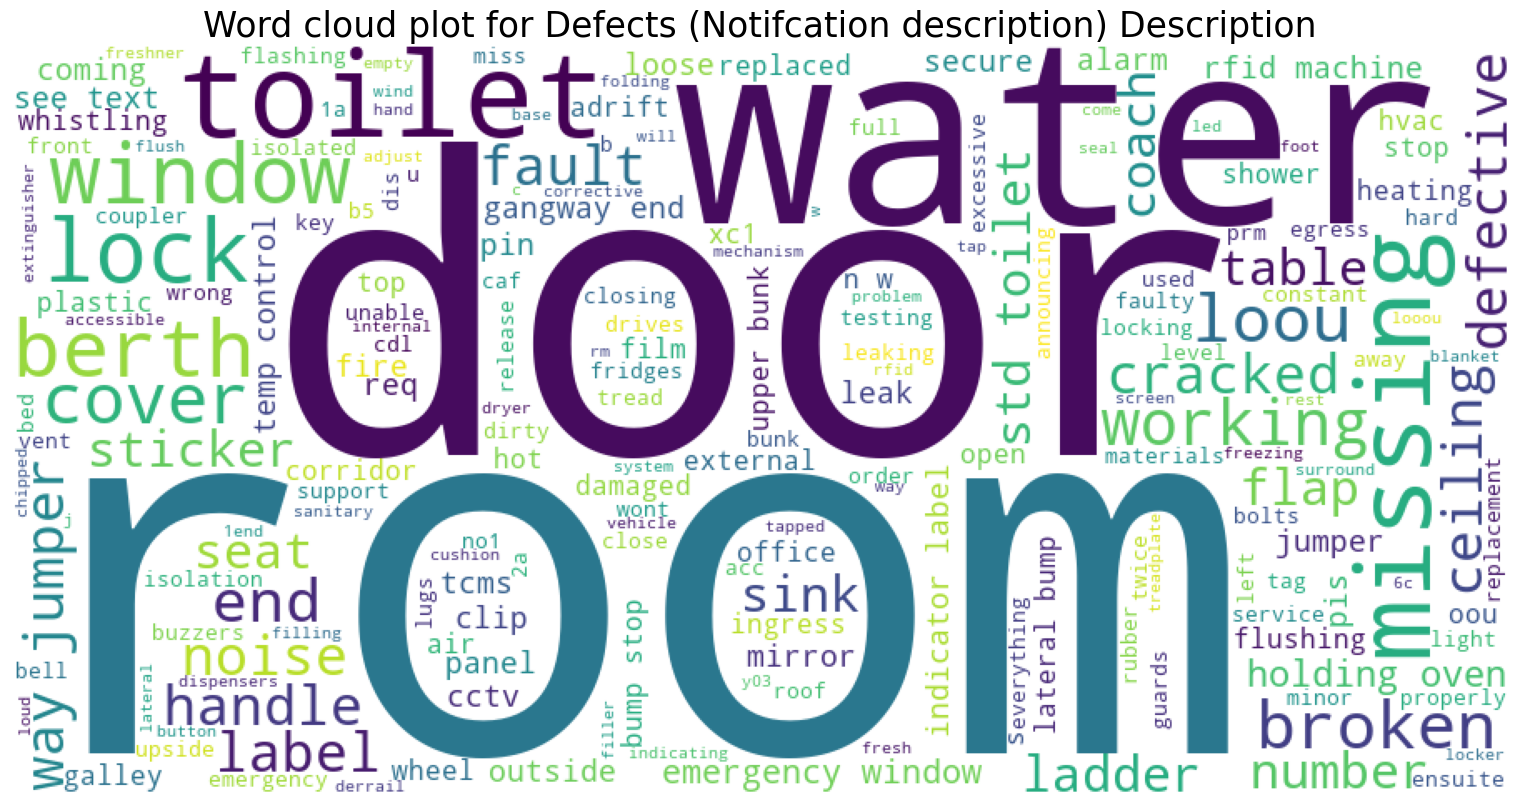

In [12]:
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in defects_df['notification_description']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 900, height = 450,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

# plot the WordCloud image
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word cloud plot for Defects (Notifcation description) Description", fontsize=25)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Observation and Insight**
- The predominant sources of failures are identified as relating to door mechanisms, toilet functionality, water systems, windows, and various instances of cracks or damages

- While the above challenges seem pronounced, closer study should be carried out on issues associated with CCTV, noise, leaks flushing etc.

* **Which Vechicle Defects are more frequent?**

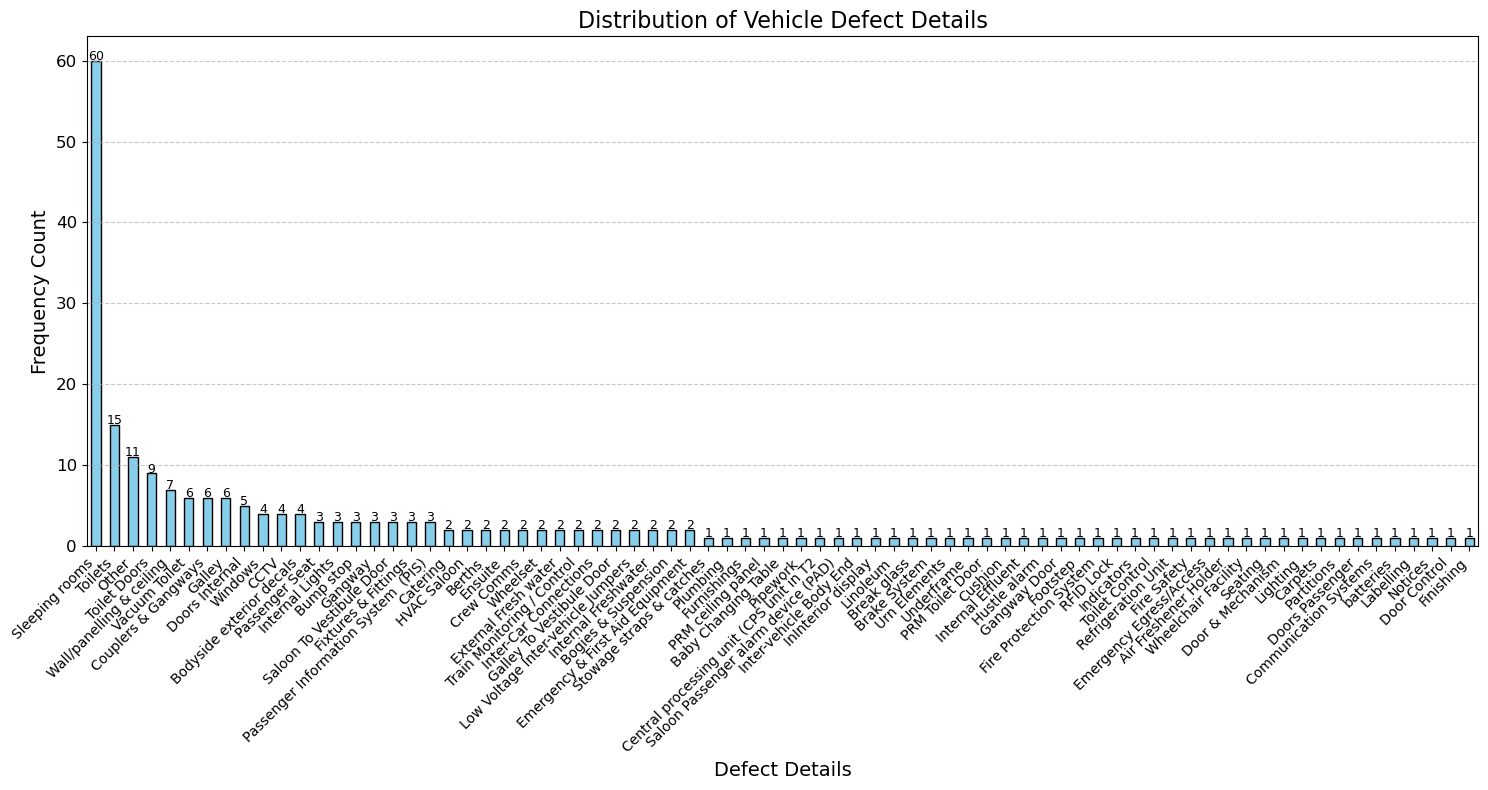

In [13]:
# Assuming vechicle_defects.details is your DataFrame column
details_counts = vechicle_defects.details.value_counts()

plt.figure(figsize=(15, 8))
bar_plot = details_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Vehicle Defect Details', fontsize=16)
plt.xlabel('Defect Details', fontsize=14)
plt.ylabel('Frequency Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding count labels on top of each bar
for i, count in enumerate(details_counts):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=9)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Observation and Insight**
- It appears that the top defects as can be seen involved; `Sleeping rooms`, `Toilets`, `Other`, `Wall/panelling & ceiling`. While these areas are pertinent for maintenance, the `other`, should be specified clearly, as it mostly suggests other areas of concern.

* **Whats the ratio of the selected defects?**

In [14]:
# Select rows where column 'B' has values 'X' or 'Y'
filtered_df = defects_df.loc[defects_df['details'].isin(['Sleeping room', 'Toilet', 'Water'])]

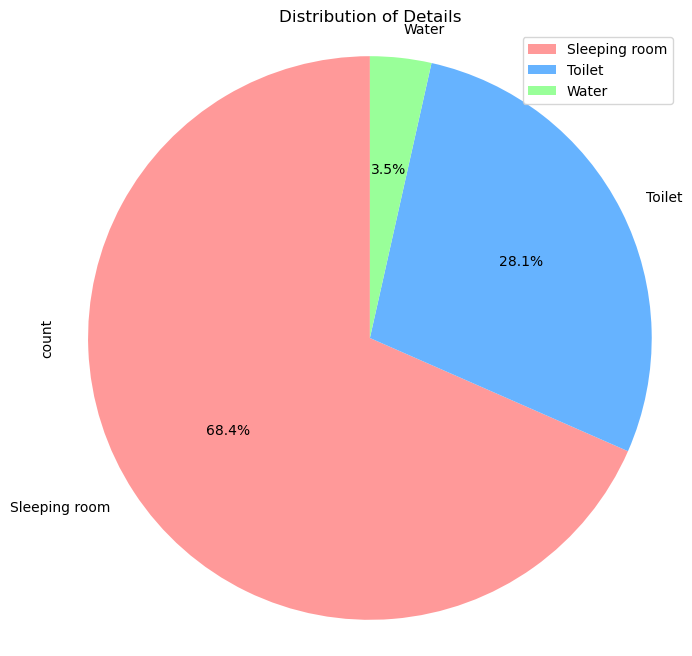

In [15]:
# Assuming filtered_df is your DataFrame
details_value_counts = filtered_df['details'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Add more colors as needed

details_value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Optional: Add a title
plt.title('Distribution of Details')

# Optional: Add a legend
plt.legend(details_value_counts.index, loc='best')

# Optional: Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

**Observation and Insight**
- Sleeping room-related maintenance constitutes the majority, encompassing 68.4% of all reported issues, followed by toilet-related defects at 28.1%, and water-related issues at a lesser 3.5%.
  
- These percentage distributions highlight a significant data imbalance, particularly notable in the 'Water' category with its minimal 3.5% representation.
  
- Addressing such data discrepancies is pivotal, with the addition of more relevant data being a recommended approach. Alternatively, leveraging data augmentation techniques could serve as a viable alternative in mitigating the challenges posed by this imbalance.

* **What is the frequency of respairs based on the notification dates?**

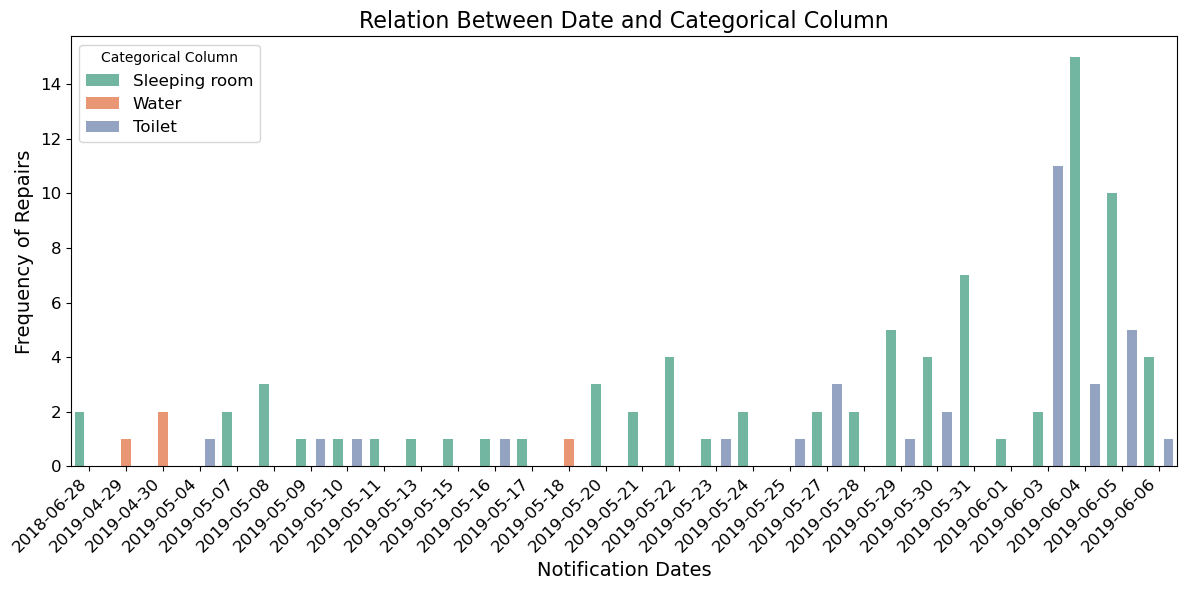

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'notification_date' is your date column and 'details' is your categorical column
plt.figure(figsize=(12, 6))
sns.countplot(x='notification_date', hue='details', data=filtered_df, palette='Set2')

plt.title('Relation Between Date and Categorical Column', fontsize=16)
plt.xlabel('Notification Dates', fontsize=14)
plt.ylabel('Frequency of Repairs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.legend(title='Categorical Column', fontsize=12)
plt.tight_layout()
plt.show()

**Observation and Insight**

- Water defects appeared to be the least prevalent among reported issues. However, this observation warrants caution as it may be influenced by the limited availability of data.
  
- Notable maintenance notifications occurred during the period spanning from 2019-05-27 to 2019-06-06, primarily attributed to sleeping room and toilet-related defects.
  
- Visualizing this data concerning the days of the week could provide further insight into the temporal distribution of maintenance notifications, offering a deeper understanding of the patterns and trends within the dataset.

* **What is the freqnecy of respairs based on days of the week?**

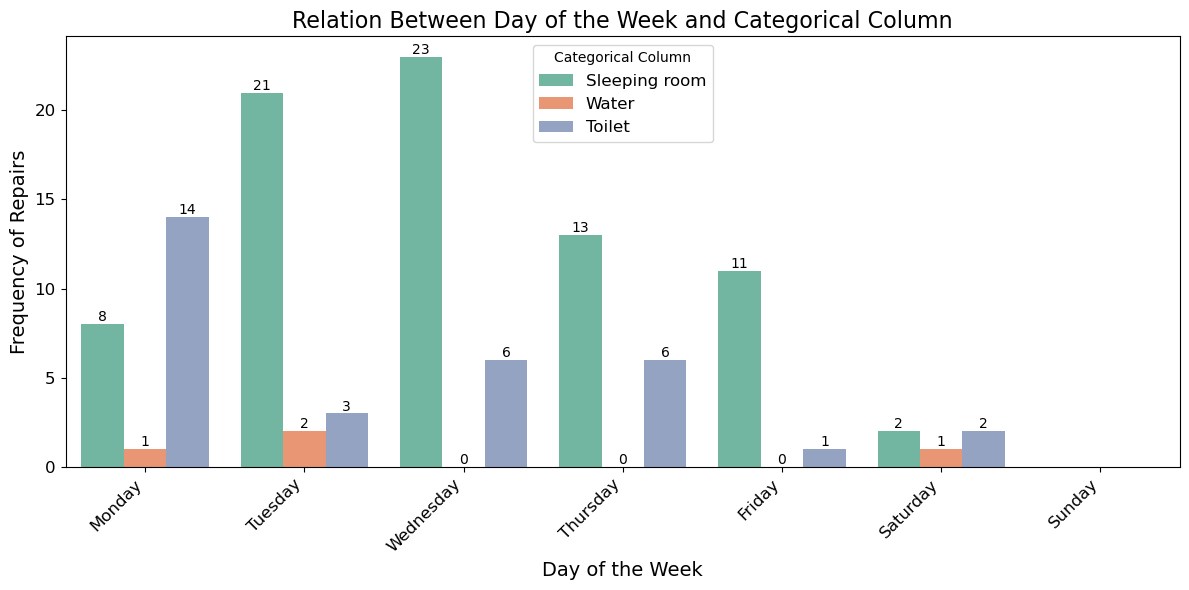

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing values in the 'notification_date' column
filtered_df = filtered_df.dropna(subset=['notification_date'])

# Convert 'notification_date' to datetime
filtered_df['notification_date'] = pd.to_datetime(filtered_df['notification_date'])

# Extract day of the week
filtered_df['day_of_week'] = filtered_df['notification_date'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='details', data=filtered_df, palette='Set2',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Relation Between Day of the Week and Categorical Column', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Frequency of Repairs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.legend(title='Categorical Column', fontsize=12)

# Adding count labels on top of each bar
for p in plt.gca().patches:
    if not pd.isna(p.get_height()):  # Check if the height is not NaN
        plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                           textcoords='offset points')

plt.tight_layout()
plt.show()

**Observation and Insight**

- It appears that major maintenances are carried out on sleeping rooms related defects for all maintenance days.

- While the next top maintained veichle defects relates to the toilet system, however, it can be observed that there were no records of water related defects on Wednesday, Thursday and Friday. 

* **Based on maintenance assigned priority, which type(s) of repairs are maintained more frequently?**

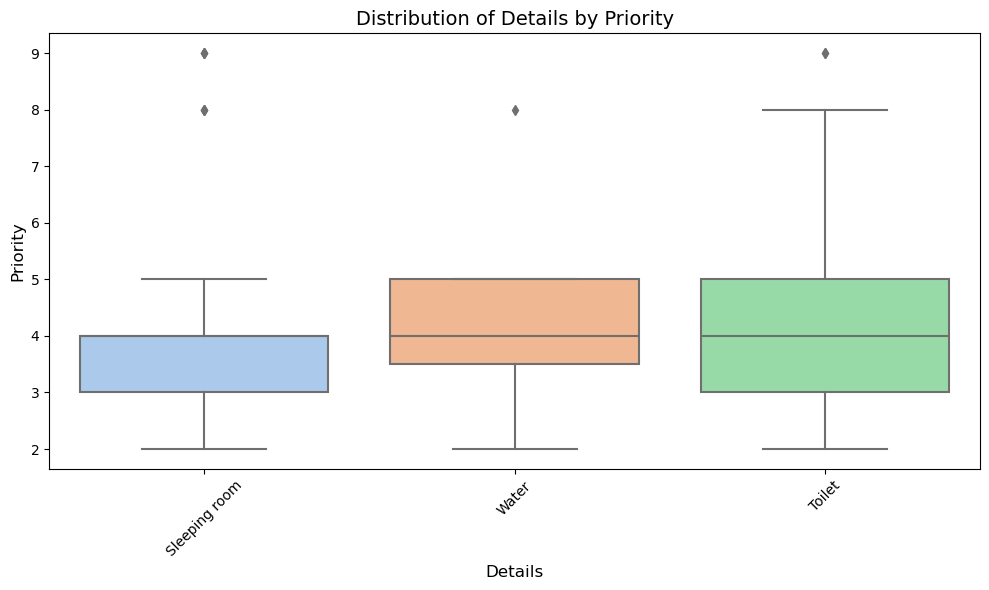

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['details'], y=filtered_df['priority'], palette='pastel')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Details', fontsize=12)
plt.ylabel('Priority', fontsize=12)
plt.title('Distribution of Details by Priority', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Observation and Insight**
- The average number of passengers notably emphasized the urgency of addressing water and toilet-related defects through maintenance measures.
  
- Conversely, the influence of passenger priority appears less pronounced in maintenance activities related to sleeping room, toilet, and water-related issues, suggesting that factors beyond passenger demands may contribute to the prioritization of maintenance tasks in these areas.

In [19]:
filtered_df.columns

Index(['vehicle_number', 'notification_date', 'notification_description',
       'notification_status', 'notification_number', 'train_number',
       'cause_code', 'details', 'failure', 'failure_details', 'failure_code',
       '.', 'lt2', 'lt4', 'lt5', 'lt6', 'lt7', 'lt8', 'lt9', 'lt10',
       'saporder_no.', 'priority', 'day_of_week'],
      dtype='object')

## Model Development

At this stage, the following machine learning models will be investigaated in the building of a machine learnig model for predictive maintenance; 

1. Logistic regression

2. Random Forest

3. Support Vector Machines

* **Feature Selection and Engineering**

In [20]:
X = [__] # The choice of predicting features becomes crucial, considering the available features present

y = filtered_df.details # target label

## Limitations and Suggestions

**Limitations**
- **Unavailability of predictive parameters:** Conditioned-based-Modelling leverages real-time data and condition monitoring techniques to assess the health of equipment and predict potential failures before they occur. This involves not only evaluating the physical conditions of assets but also delving into the underlying factors contributing to their degradation and failure modes. Hence, the data provided does not have the relevant attributes of input features which can predict our selected output. 

**Suggestions**
- Relavant data describing the physical conditions of the vechicle, amd other factors contributing to their degradation and failure modes should be obtained.

- However, in a case where data is not available, building a reactive solution or maintenance solution, e.g. Sentimental analysis classification can be adopted. The flow of the solution can be described in the image below;

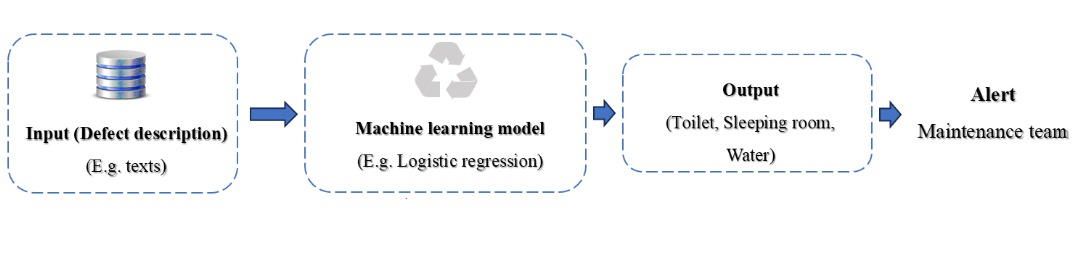